In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
# Reading hash returns
global_hash_path = Path("global_hash_rates.csv")
hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)
hash_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_53714/2504355210.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)


,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [3]:
# Cleaning the data
hash_df.isnull().sum()
hash_df.isnull().sum() / len(hash_df) * 100
hash_df.dropna(inplace=True)
hash_df.sort_index(inplace=True)
hash_df.head()

,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [4]:
# Cleaning the data / drop monthly hash rate column
hash_df = hash_df.drop(columns=["monthly_hashrate_%"])
hash_df.head(10)

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-09-01,Other,5.39
2019-09-01,Russian Federation,5.24
2019-09-01,United States,3.59
2019-09-01,Malaysia,2.88
2019-09-01,"Iran, Islamic Rep.",1.54
2019-09-01,Kazakhstan,1.26
2019-09-01,Canada,0.94
2019-09-01,Germany *,0.80


In [26]:
# Cleaning the data specific to country
# Mainland China
hash_df_China = hash_df.loc[hash_df['country'] == 'Mainland China'].copy()
hash_df_China.head()
# Other
hash_df_Other = hash_df.loc[hash_df['country'] == 'Other'].copy()
hash_df_Other.head(10)
# Russian Federation
hash_df_Russia = hash_df.loc[hash_df['country'] == 'Russian Federation'].copy()
hash_df_Russia.head(10)
# United States
hash_df_US = hash_df.loc[hash_df['country'] == 'United States'].copy()
hash_df_US.head(10)
# Malaysia
hash_df_Malaysia = hash_df.loc[hash_df['country'] == 'Malaysia'].copy()
hash_df_Malaysia.head(10)
# Iran
hash_df_Iran = hash_df.loc[hash_df['country'] == 'Iran, Islamic Rep.'].copy()
hash_df_Iran.head(10)
# Kazakhstan
hash_df_Kazakhstan = hash_df.loc[hash_df['country'] == 'Kazakhstan'].copy()
hash_df_Kazakhstan.head(10)
# Kazakhstan
hash_df_Canada = hash_df.loc[hash_df['country'] == 'Canada'].copy()
hash_df_Canada.head(10)
# Germany
hash_df_Germany = hash_df.loc[hash_df['country'] == 'Germany *'].copy()
hash_df_Germany.head(10)
# Germany
hash_df_Ireland = hash_df.loc[hash_df['country'] == 'Ireland *'].copy()
#hash_df_Ireland_returns = hash_df_Ireland.pct_change(['monthly_absolute_hashrate_EH/S'])
hash_df_Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
hash_df_Ireland_returns.head(100)

date
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01          NaN
2020-01-01          NaN
2020-02-01          NaN
2020-03-01          NaN
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          inf
2020-07-01    -0.500000
2020-08-01     3.000000
2020-09-01    46.750000
2020-10-01     0.732984
2020-11-01     0.196375
2020-12-01     0.063131
2021-01-01    -0.083135
2021-02-01    -0.163212
2021-03-01     0.024768
2021-04-01     0.078550
2021-05-01     0.014006
2021-06-01    -0.052486
2021-07-01     0.481050
2021-08-01     0.112205
2021-09-01    -0.479646
2021-10-01     0.180272
2021-11-01    -0.002882
2021-12-01     0.028902
2022-01-01     0.036517
Name: monthly_absolute_hashrate_EH/S, dtype: float64

/Users/russellgould/anaconda3/envs/dev/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='date'>

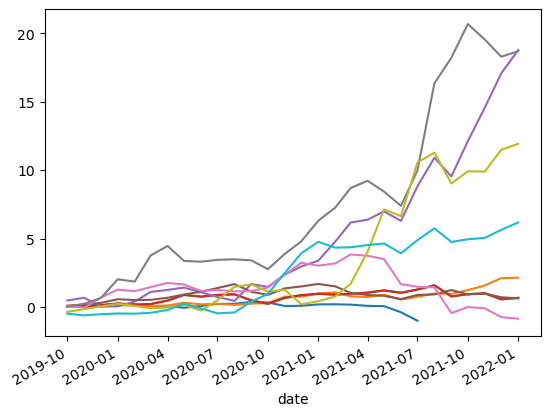

In [49]:
#Calculate China daily returns and cumulative returns
China_returns = hash_df_China.iloc[:,1].pct_change()
China_returns.dropna(inplace=True)
China_returns.head(20)
#Calculate cumulative returns
cumulative_China_returns = (1 + China_returns).cumprod() - 1
cumulative_China_returns.plot()

#Calculate Other daily returns and cumulative returns
Other_returns = hash_df_Other.iloc[:,1].pct_change()
Other_returns.dropna(inplace=True)
Other_returns.head(20)
#Calculate cumulative returns
cumulative_Other_returns = (1 + Other_returns).cumprod() - 1
cumulative_Other_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate US daily returns and cumulative returns
US_returns = hash_df_US.iloc[:,1].pct_change()
US_returns.dropna(inplace=True)
US_returns.head(20)
#Calculate cumulative returns
cumulative_US_returns = (1 + US_returns).cumprod() - 1
cumulative_US_returns.plot()

#Calculate Malaysia daily returns and cumulative returns
Malaysia_returns = hash_df_Malaysia.iloc[:,1].pct_change()
Malaysia_returns.dropna(inplace=True)
Malaysia_returns.head(20)
#Calculate cumulative returns
cumulative_Malaysia_returns = (1 + Malaysia_returns).cumprod() - 1
cumulative_Malaysia_returns.plot()

#Calculate Iran daily returns and cumulative returns
Iran_returns = hash_df_Iran.iloc[:,1].pct_change()
Iran_returns.dropna(inplace=True)
Iran_returns.head(20)
#Calculate cumulative returns
cumulative_Iran_returns = (1 + Iran_returns).cumprod() - 1
cumulative_Iran_returns.plot()

#Calculate Kazakhstan daily returns and cumulative returns
Kazakhstan_returns = hash_df_Kazakhstan.iloc[:,1].pct_change()
Kazakhstan_returns.dropna(inplace=True)
Kazakhstan_returns.head(20)
#Calculate cumulative returns
cumulative_Kazakhstan_returns = (1 + Kazakhstan_returns).cumprod() - 1
cumulative_Kazakhstan_returns.plot()

#Calculate Canada daily returns and cumulative returns
Canada_returns = hash_df_Canada.iloc[:,1].pct_change()
Canada_returns.dropna(inplace=True)
Canada_returns.head(20)
#Calculate cumulative returns
cumulative_Canada_returns = (1 + Canada_returns).cumprod() - 1
cumulative_Canada_returns.plot()

#Calculate Germany daily returns and cumulative returns
Germany_returns = hash_df_Germany.iloc[:,1].pct_change()
Germany_returns.dropna(inplace=True)
Germany_returns.head(20)
#Calculate cumulative returns
cumulative_Germany_returns = (1 + Germany_returns).cumprod() - 1
cumulative_Germany_returns.plot()

#Calculate Ireland daily returns and cumulative returns
Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
Ireland_returns.dropna(inplace=True)
Ireland_returns.head(20)
#Calculate cumulative returns
cumulative_Ireland_returns = (1 + Ireland_returns).cumprod() - 1
cumulative_Ireland_returns.plot()


<Axes: xlabel='date'>

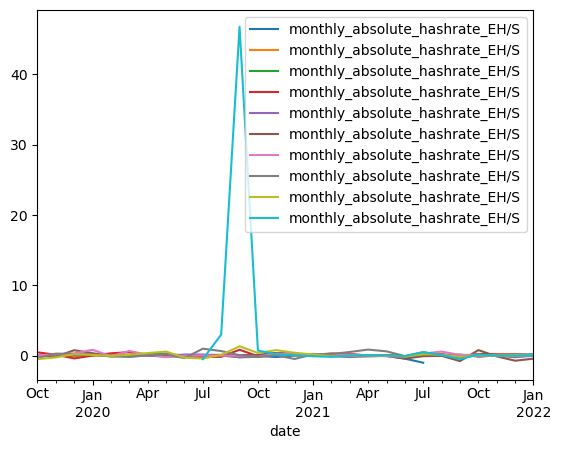

In [68]:
#New Data Frame / Cumulative returns
combined_df = pd.concat([China_returns,Other_returns,Russia_returns,US_returns,Malaysia_returns,Iran_returns,Kazakhstan_returns,Canada_returns,Germany_returns,Ireland_returns], axis="columns", join="outer")
combined_df.head(40)
combined_df.plot()